# Dataset Description

This dataset provides detailed information about 600 samples of wine, including their chemical properties, sensory characteristics, and overall quality ratings. The aim is to analyze the relationships between the physical and chemical attributes of wine and their perceived quality, as rated on a scale of 1 to 10.

Key features include acidity levels, sugar content, sulfur dioxide concentration, alcohol percentage, and descriptors such as wine type (e.g., White, Port, Rose) and taste profile (e.g., Balanced, Earthy, Sour). These attributes are commonly used to evaluate wine quality and identify factors that influence consumer preferences.

The data is a mix of numerical and categorical columns, with a few missing values in fields like name, citric acid, total sulfur dioxide, and Taste. This makes it an excellent resource for building a machine learning models to predict wine quality.

#### Key Statistics
1. Fixed Acidity: Mean = 8.92, Range = [4.6, 15.6].
2. Residual Sugar: Mean = 2.63, Range = [1.2, 15.5].
3. Alcohol: Mean = 10.16%, Range = [8.4%, 14%].
4. Quality: Mean = 5.61, Mode = 5, Range = [3, 8].


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("Dataset.csv")
df.head(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,1,Chardonnay,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,2,Cabernet Sauvignon,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,3,Merlot,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,4,Pinot Noir,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,5,Zinfandel,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


In [8]:
df.tail(5)

,id,name,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
594,595,Soave,7.9,0.17,2.6,0.096,38.0,0.9978,0.53,9.5,Port,Bitter,5
595,596,Orvieto,8.9,0.41,7.9,0.086,109.0,0.9998,0.57,9.3,White,Sour,5
596,597,Cote-Rotie,12.4,0.51,2.0,0.059,24.0,0.9994,0.60,9.3,White,Sour,6
597,598,Chablis,11.9,0.58,1.9,0.071,18.0,0.9980,0.63,10.0,Rose,Balanced,6
598,599,Pouilly-Fuisse,8.5,0.18,2.1,0.078,30.0,0.9967,0.48,9.8,Red,Sour,6


In [9]:
df.describe()

,id,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,599.000000,598.000000,597.000000,599.000000,598.000000,595.000000,596.000000,599.000000,599.000000,599.000000
mean,300.000000,8.915050,0.323970,2.633806,0.093630,50.643697,0.997602,0.694741,10.161770,5.609349
std,173.060683,1.988234,0.212241,1.355848,0.056598,33.788769,0.001781,0.202039,1.018339,0.793565
min,1.000000,4.600000,0.000000,1.200000,0.039000,8.000000,0.991200,0.330000,8.400000,3.000000
25%,150.500000,7.500000,0.140000,1.900000,0.073000,24.000000,0.996500,0.570000,9.400000,5.000000
50%,300.000000,8.400000,0.310000,2.300000,0.083000,42.000000,0.997400,0.640000,9.900000,6.000000
75%,449.500000,10.300000,0.490000,2.700000,0.094000,65.000000,0.998700,0.770000,10.650000,6.000000
max,599.000000,15.600000,1.000000,15.500000,0.611000,165.000000,1.003200,2.000000,14.000000,8.000000


In [10]:
df.dtypes

id                        int64
name                     object
fixed acidity           float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
Taste                    object
quality                   int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    599 non-null    int64  
 1   name                  599 non-null    object 
 2   fixed acidity         598 non-null    float64
 3   citric acid           597 non-null    float64
 4   residual sugar        599 non-null    float64
 5   chlorides             598 non-null    float64
 6   total sulfur dioxide  595 non-null    float64
 7   density               596 non-null    float64
 8   sulphates             599 non-null    float64
 9   alcohol               599 non-null    float64
 10  type                  596 non-null    object 
 11  Taste                 594 non-null    object 
 12  quality               599 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 61.0+ KB


## Removing Irrelevant Columns

### Removing columns like "id" and "name" as they are not relevent to our analysis.

In [33]:
df=df.drop(['id','name'],axis=1)
df.head(5)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
0,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Port,Balanced,5
1,7.8,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,White,Sour,5
2,7.8,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Rose,Earthy,5
3,11.2,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,White,Bitter,6
4,7.4,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Rose,Balanced,5


## Checking for any duplicate rows in the dataset and discarding them if any.

In [34]:
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

,fixed acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,type,Taste,quality
535,9.1,0.24,2.1,0.078,28.0,0.999,0.87,10.3,Port,Sweet,6


In [36]:
df=df.drop_duplicates()
print("Number of Duplicate rows : ", (df[df.duplicated()]).shape)

Number of Duplicate rows :  (0, 11)


## Checking for Null values in Dataset and Removing it


In [43]:
print(df.isnull().sum())

fixed acidity           1
citric acid             2
residual sugar          0
chlorides               1
total sulfur dioxide    4
density                 3
sulphates               0
alcohol                 0
type                    3
Taste                   5
quality                 0
dtype: int64


In [14]:
df = df.dropna()
print(df.isnull().sum())

fixed acidity           0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
Taste                   0
quality                 0
dtype: int64


## Detecting Outtliers in Dataset

<Axes: xlabel='fixed acidity'>

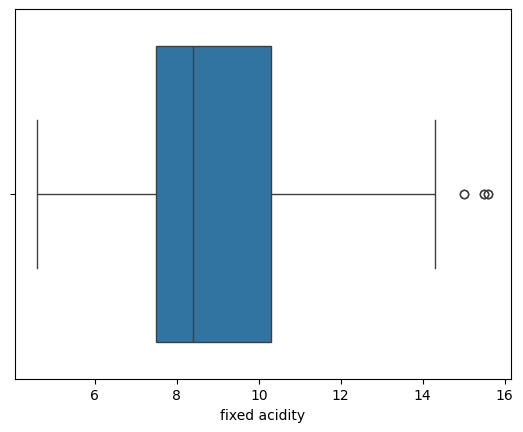

In [45]:
sns.boxplot(x=df['fixed acidity'])

#### There Are 3 Outliers in the "fixed acidity" column

In [54]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [55]:
for col in df.columns:
    if(col=="type" or col=="Taste" or col=="quality"):
        pass
    else:
        df = remove_outliers(df, col)

#### All the outliers from all colums have been removed.

In [56]:
df.shape

(420, 11)

<br>

## Plotting the Dataset

### Histogram is a data visualization technique that is used to visualize generally one variable

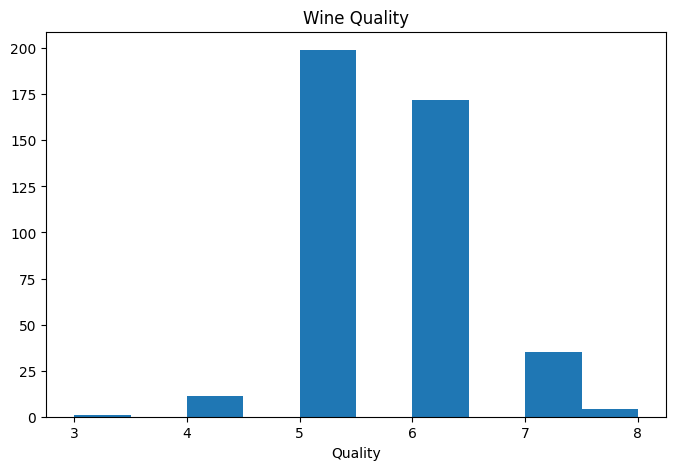

In [19]:
quality = df['quality']
plt.figure(figsize=(8, 5))
plt.xlabel("Quality")
plt.ylabel("")
plt.title("Wine Quality")
plt.hist(quality)
plt.show()

### As we can see the chart is somewhat normally distributed (Rightly Skewed). Around 250 wines have an average quality of 5. There are no wines with quality lower than 3 and higher than 8.
<br>

### Heatmap
#### Heatmap is generally used to show the correlation of all the numeric variable to all the other numeric variables.

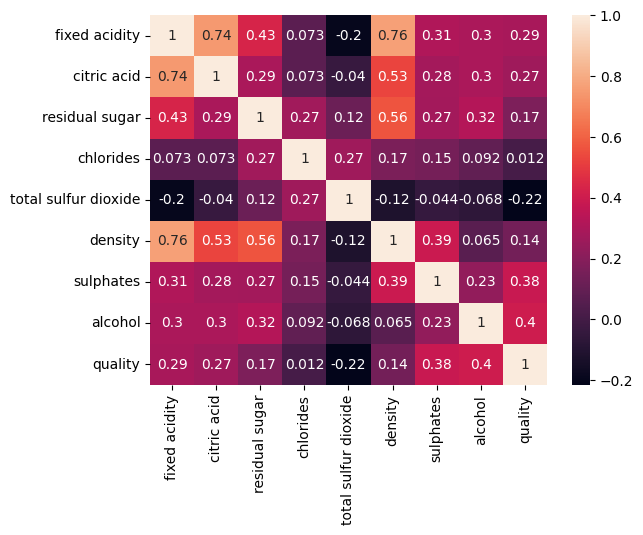

In [60]:
numeric_df = df.select_dtypes(['int64', 'float64'])
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

<br>

### Scatter Plot
#### Useful for visualizing the relationship between two continuous variables.


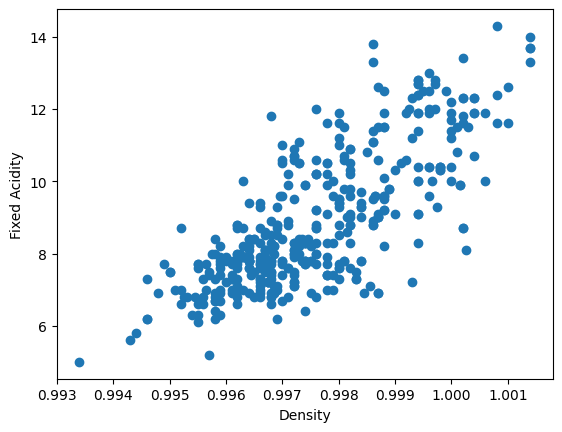

In [64]:
fig, ax = plt.subplots()
ax.scatter(df['density'], df['fixed acidity'])
ax.set_xlabel('Density')
ax.set_ylabel('Fixed Acidity')
plt.show()

#### We can see a slight positive corelation between fixed acidity and density.

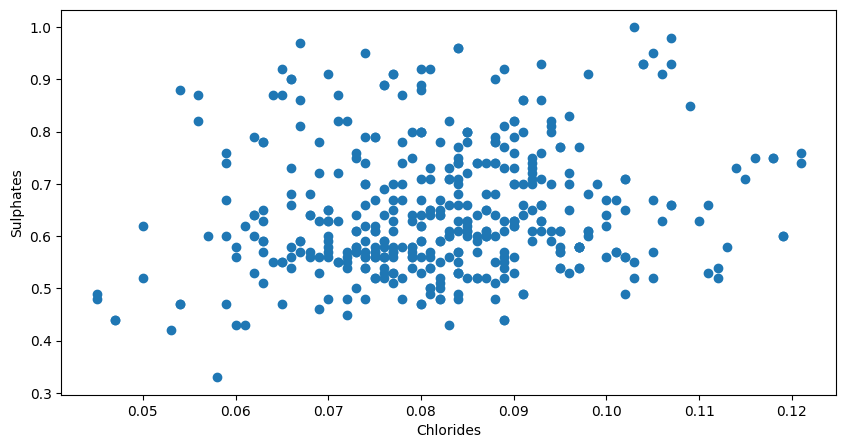

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['chlorides'], df['sulphates'])
ax.set_xlabel('Chlorides')
ax.set_ylabel('Sulphates')
plt.show()

#### There is no corelation between Sulphates and Chlorides.